In [40]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [41]:
customer_data = pd.read_csv('./shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
customer_data.shape

(200, 5)

In [43]:
data = customer_data.iloc[:,2:5].values

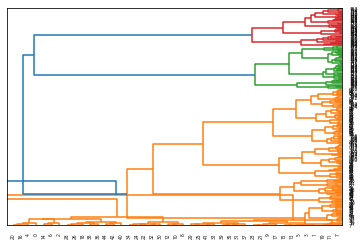

In [44]:
#방법 1
# 계층적군집을 수행할 때 거리 정보가 담긴 배열을 리턴
linkage_array = ward(data)
# 클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 덴드로 그램을 그림
dendrogram(linkage_array)

#방법 2
#linkage(데이터, method='거리측정방식')
d1 = linkage(data, method='ward')
#orientation='방향' = 그림의 방향 설정
dr1 = dendrogram(d1, orientation='left')

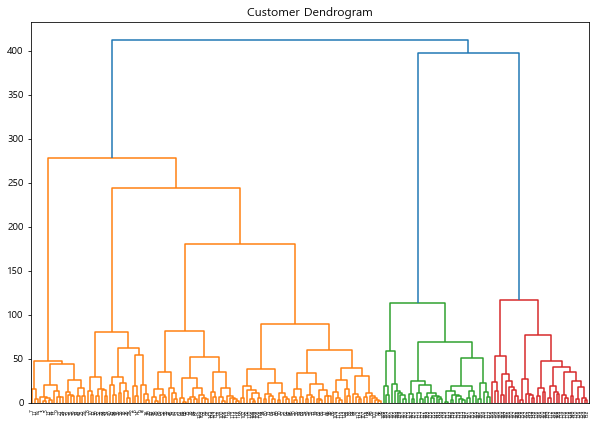

In [45]:
plt.figure(figsize= (10,7))
plt.title('Customer Dendrogram')
#방법 3 
dend = dendrogram(linkage(data, method='ward'))

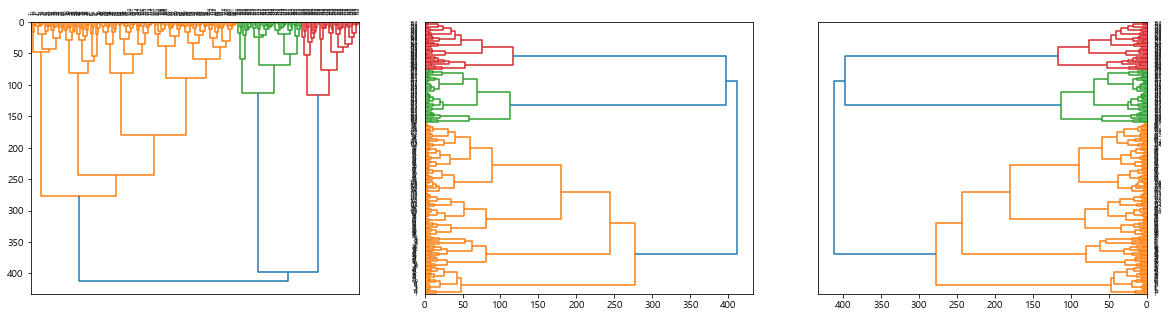

In [46]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
d1 = dendrogram(linkage(data, method='ward'),orientation='bottom')

ax2 = fig.add_subplot(1,3,2)
d2 = dendrogram(linkage(data, method='ward'),orientation='right')

ax3 = fig.add_subplot(1,3,3)
d3 = dendrogram(linkage(data, method='ward'),orientation='left')

In [47]:
from sklearn.cluster import AgglomerativeClustering # 계층적 군집분석
from scipy.cluster.hierarchy import dendrogram, linkage # 시각화 특화

* sklearn 같은 경우에는 덴드로그램 처럼 시각화 할 수없음
* 군집이 어떤 과정으로 생성되었는지 시각화 하고 싶으면 덴드로그램 사용.

In [48]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
pred = cluster.fit_predict(data)


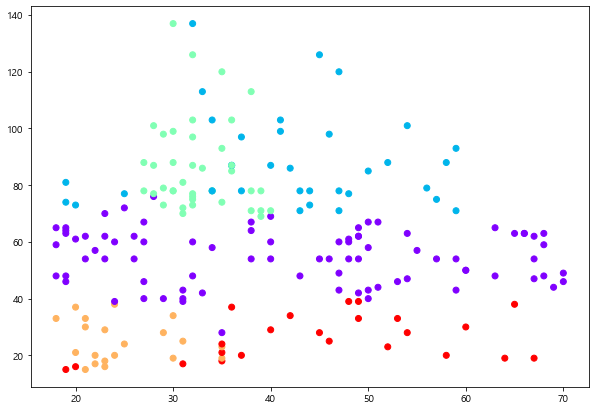

In [49]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1], c= cluster.labels_, cmap='rainbow')
plt.show()